# Reconhecimento de Dígitos (PCA)
Péricles S. G. Marques

https://www.linkedin.com/in/periclessavio/

### Objetivo:
Reduzir a dimensionalidade da base de dados.

___

##### Carregar a base de dados

In [39]:
from sklearn.datasets import load_digits #importa o dataset "load_digits"
digits = load_digits()

##### Checkar o tamanho da base deo dataset

In [40]:
digits.data.shape
print(f'O dataset tem {digits.data.shape[0]} linhas e {digits.data.shape[1]} colunas.')

O dataset tem 1797 linhas e 64 colunas.


##### Visualizar os dados

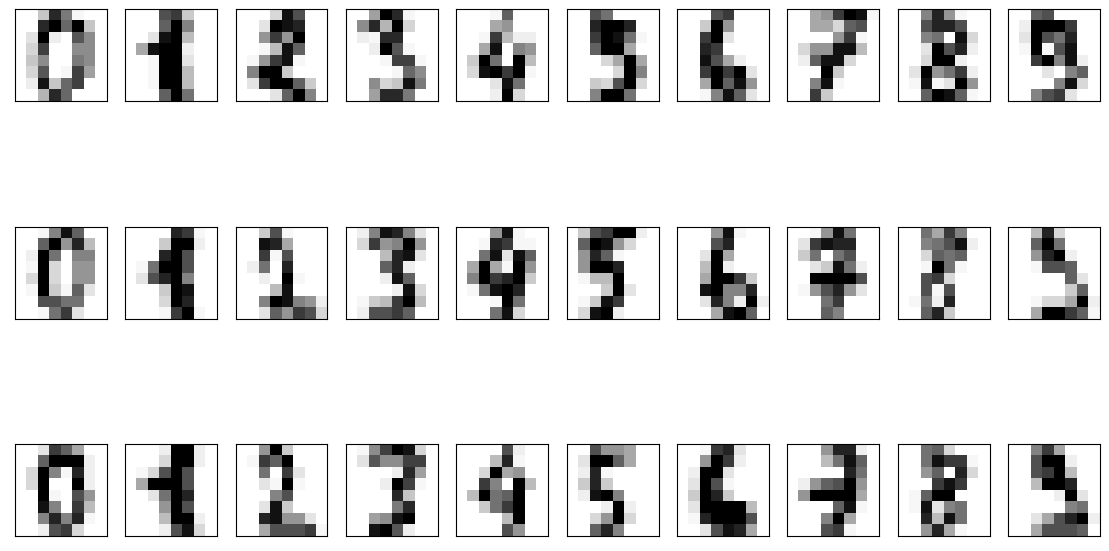

In [41]:
import matplotlib.pyplot as plt

def plot_digits(data):
    fig, axes = plt.subplots(3, 10, figsize=(14, 8), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='Greys')
plot_digits(digits.data)

##### PCA

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # project from 64 to 2 dimensions
reduced = pca.fit_transform(digits.data)
print(reduced.shape)

(1797, 2)


##### Visualizar os dados

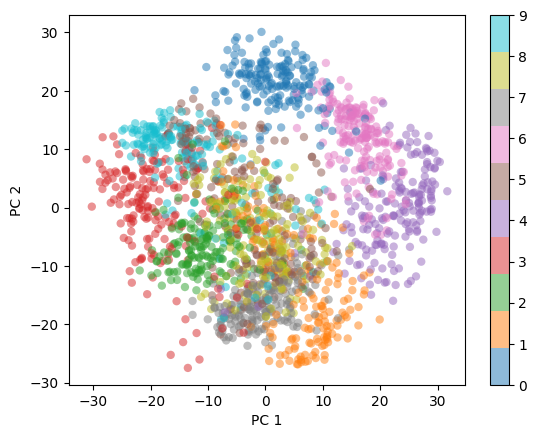

In [43]:
plt.scatter(reduced[:, 0], reduced[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()

plt.show()

Ao reduzir a dimensionalidade de 64 para 2, é possível visualizar os dados em um gráfico 2D. Dígitos que parecem semelhantes se agrupam.

##### Variância explicada

In [44]:
print('Variância: ', pca.explained_variance_ratio_)
print('Variância total: ', pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

Variância:  [0.14890594 0.13618771]
Variância total:  0.2850936482369735


Os dois primeiros componentes principais capturam apenas 28,5% da variância contida na representação original de 64 dimensões.

##### Variância explicada acumulada X Número de componentes

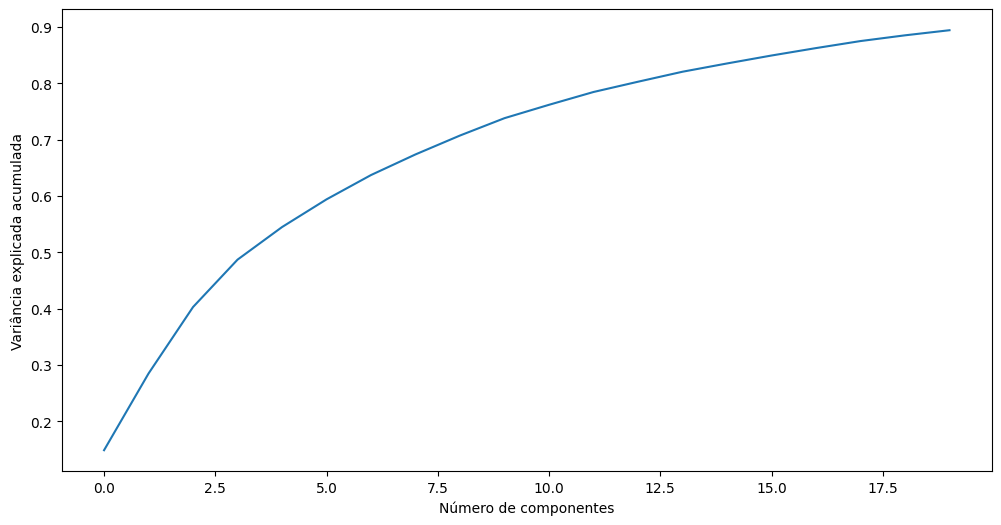

In [45]:
import pandas as pd

pca = PCA(n_components=20)  # project from 64 to 2 dimensions
reduced = pca.fit_transform(digits.data)

va = pd.DataFrame(pca.explained_variance_ratio_)
va['acumulado'] = va.cumsum()

plt.figure(figsize=(12,6))
plt.plot(va['acumulado'])
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada acumulada')
plt.show()